In [1]:
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
import pandas as pd
import time
import re
from bs4 import BeautifulSoup

In [2]:
URL = 'https://harvest.finance/'
# page = requests.get(URL)

# initiating the webdriver. Parameter includes the path of the webdriver.
## make sure you keep chromedriver in the same path as the code
## install driver as per the chrome version
# driver = webdriver.Chrome('./chromedriver') 

driver_path = "./chromedriver"
brave_path = "/Applications/Brave Browser.app/Contents/MacOS/Brave Browser"

option = webdriver.ChromeOptions()
option.binary_location = brave_path
# option.add_argument("--incognito") OPTIONAL
# option.add_argument("--headless") OPTIONAL

# Create new Instance of Chrome
driver = webdriver.Chrome(executable_path=driver_path, options=option)

driver.get(URL) 



# this is just to ensure that the page is loaded
time.sleep(5)

In [3]:
## open all the harvest finance groups to get individual APYs
for i in range(13):
    driver.find_element_by_xpath('//div[@class="hv__sc-7s5idx-3 fHNtjM"]//*[name()="svg"][@data-icon="angle-down"]').click()

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <style type="text/css">
   svg:not(:root).svg-inline--fa {
  overflow: visible;
}

.svg-inline--fa {
  display: inline-block;
  font-size: inherit;
  height: 1em;
  overflow: visible;
  vertical-align: -0.125em;
}
.svg-inline--fa.fa-lg {
  vertical-align: -0.225em;
}
.svg-inline--fa.fa-w-1 {
  width: 0.0625em;
}
.svg-inline--fa.fa-w-2 {
  width: 0.125em;
}
.svg-inline--fa.fa-w-3 {
  width: 0.1875em;
}
.svg-inline--fa.fa-w-4 {
  width: 0.25em;
}
.svg-inline--fa.fa-w-5 {
  width: 0.3125em;
}
.svg-inline--fa.fa-w-6 {
  width: 0.375em;
}
.svg-inline--fa.fa-w-7 {
  width: 0.4375em;
}
.svg-inline--fa.fa-w-8 {
  width: 0.5em;
}
.svg-inline--fa.fa-w-9 {
  width: 0.5625em;
}
.svg-inline--fa.fa-w-10 {
  width: 0.625em;
}
.svg-inline--fa.fa-w-11 {
  width: 0.6875em;
}
.svg-inline--fa.fa-w-12 {
  width: 0.75em;
}
.svg-inline--fa.fa-w-13 {
  width: 0.8125em;
}
.svg-inline--fa.fa-w-14 {
  width: 0.875em;
}
.svg-inline--fa.fa-w-15 {
  width: 0.9375
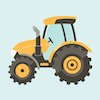
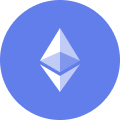
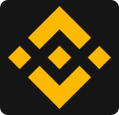
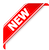
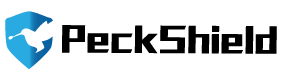
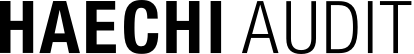
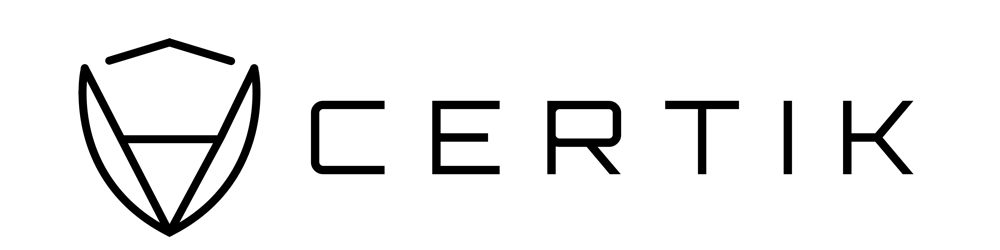
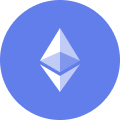
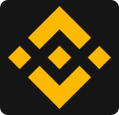
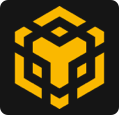

In [4]:
html = driver.page_source

# this renders the JS code and stores all
# of the information in static HTML code.

# Now, we could simply apply bs4 to html variable
soup = BeautifulSoup(html, "html.parser")

## Check the extracted data
print(soup.prettify())

In [5]:
## Extract vault ids for all harvest vaults
all_ids = soup.findAll('div', id=re.compile('^vault-'))

## get all the vault ids
vault_ids = []
for vault_id in all_ids:
    vault_ids.append(vault_id.get('id'))

## check all the vault ids
print(vault_ids)

['vault-panel-tooltop-0', 'vault-panel-tooltop-1', 'vault-panel-tooltop-profit-sharing-farm', 'vault-Stablecoins', 'vault-panel-tooltop-2', 'vault-panel-tooltop-3', 'vault-panel-tooltop-5', 'vault-panel-tooltop-16', 'vault-panel-tooltop-18', 'vault-panel-tooltop-19', 'vault-panel-tooltop-21', 'vault-panel-tooltop-22', 'vault-panel-tooltop-23', 'vault-panel-tooltop-48', 'vault-panel-tooltop-49', 'vault-panel-tooltop-50', 'vault-panel-tooltop-67', 'vault-BTC', 'vault-panel-tooltop-15', 'vault-panel-tooltop-17', 'vault-panel-tooltop-20', 'vault-panel-tooltop-24', 'vault-panel-tooltop-25', 'vault-ETH 2.0', 'vault-panel-tooltop-57', 'vault-Uniswap Liquidity', 'vault-panel-tooltop-7', 'vault-panel-tooltop-59', 'vault-panel-tooltop-60', 'vault-panel-tooltop-75', 'vault-panel-tooltop-76', 'vault-panel-tooltop-FARM_WETH_LP', 'vault-panel-tooltop-FARM_GRAIN_LP', 'vault-Sushiswap', 'vault-panel-tooltop-8', 'vault-panel-tooltop-9', 'vault-panel-tooltop-10', 'vault-panel-tooltop-11', 'vault-panel-t

In [6]:
import os

if os.path.isfile('harvest_vaults_data.csv'):
    harvest_data = pd.read_csv('harvest_vaults_data.csv', index_col=0)
else:
    harvest_data = pd.DataFrame(columns = ['vault_name', 'vault_apy', 'vault_total_assets'], index=pd.to_datetime([]))

In [7]:
## extract data from all the harvest vaults

for vault_id in vault_ids:

    ## extract the vault data
    results = soup.find_all("div", {"data-for": vault_id})

    ## check all the extracted data
#     print(len(results), results[0])
    
    ## extract vault information using div class "hv__sc-10fnk7c-4 jRqRUQ"
    results_value = results[0].find_all("div", {"class": "hv__sc-10fnk7c-4 jRqRUQ"})
    token_name = None
    for result in results_value:
        token_name = result['data-for'].replace('token-info-', '').strip()
        token = result.text.split('Chad embodies')[0] ## cleaning the token name with Chad embodies
        print(token, result['data-for'])
    
    if not token_name:
        continue
    
    results_value = results[0].find_all("div", {"data-for": token_name})
    for result in results_value:
        vault_apy = result.text
        print(result.text)
        
    results_value = results[0].find_all("div", {"data-for": "deposit-details-" + token_name})
    for result in results_value:
        vault_total_assets = result.text
        print(result.text)
    
    ## storing data in pandas dataframe, timezone is in UTC
    harvest_data.loc[pd.to_datetime("now"), :] = (token, vault_apy, vault_total_assets)

 WETH token-info-WETH
6.03%  
10.57M
 COMFI-ETH token-info-complifi_COMPFI_WETH
10000%+  
361.31K
 FARM token-info-FARM
51.81%
27.74M
 USDC token-info-USDC
10.79%  
15.05M
 USDT token-info-USDT
12.12%  
3.43M
 DAI token-info-DAI
12.19%  
5.69M
 CRV:HUSD token-info-crvHUSD
6.86%  
1.71M
 YCRV token-info-YCRV
9.13%  
1.42M
 3CRV token-info-ThreePool
5.38%  
8.04M
 CRV:COMPOUND token-info-crvCOMPOUND
9.02%  
1.53M
 CRV:BUSD token-info-crvBUSD
9.67%  
2.43M
 CRV:USDN token-info-crvUSDN
32.63%  
2.56M
 CRV:EURS token-info-crvEURS
23.33%  
585.08K
 CRV:GUSD token-info-crvGUSD
12.05%  
182.42K
 CRV:UST token-info-crvUST
11.47%  
243.35K
 CRV:USDP token-info-crvUSDP
25.61%  
146.49K
 CRV:HBTC token-info-crvHBTC
6.50%  
8.66M
 CRV:OBTC token-info-crvOBTC
12.26%  
6.38M
 CRV:TBTC token-info-TBTCMixed
3.04%  
461.66K
 CRV:RENWBTC token-info-CRVRENWBTC
2.24%  
40.96M
 WBTC token-info-WBTC
3.02%  
739.96K
 CRV:STETH token-info-crvSTETH
8.11%  
39.56M
 ETH-DPI token-info-ETH-DPI
41.59%  
2.58M
 WBTC

In [8]:
harvest_data.tail()

,vault_name,vault_apy,vault_total_assets
2021-05-24 16:42:47.473331,DAI-BSGS,Inactive,3.03K
2021-05-24 16:42:47.531156,BAC,Inactive,196.06
2021-05-24 16:42:47.679275,ESD,Inactive,8.40K
2021-05-24 16:42:47.754175,DSD,Inactive,1.58K
2021-05-24 16:42:47.833935,FARM/USDC,Inactive,49.18K


In [9]:
harvest_data.head()

,vault_name,vault_apy,vault_total_assets
2021-04-19 18:16:07.770006,WETH,6.97%,14.12M
2021-04-19 18:16:07.834631,MEME20-ETH,582.15%,138.36K
2021-04-19 18:16:07.919914,GPUNKS20-ETH,718.01%,68.43K
2021-04-19 18:16:07.969280,ETH-MVI,34.46%,874.25K
2021-04-19 18:16:08.006898,KXUSD-DAI,265.00%,285.16K


In [10]:
harvest_data.isna().sum()

vault_name            0
vault_apy             0
vault_total_assets    0
dtype: int64

In [11]:
harvest_data.to_csv('harvest_vaults_data.csv')

In [12]:
harvest_data.shape

(2693, 3)

### Not required to run ------------------------------------------------------------------------------------------

In [36]:
## extract the data when all the svg tabs are closed, not required if tabs are open

# for vault_id in vault_ids:

#     ## extract the vault data
#     results = soup.find_all("div", {"data-for": vault_id})

#     ## check all the extracted data
# #     print(len(results), results[0])
    
# #     break

#     ## extract vault information using div class "hv__sc-10fnk7c-4 jRqRUQ"
#     results_value = results[0].find_all("div", {"class": "hv__sc-7s5idx-1 dJXGHv"})
#     for result in results_value:
#         print(result.text)
    
#     results_value = results[0].find_all("div", {"class": "hv__sc-7s5idx-5 EvSIe"})
#     for result in results_value:
#         print(result.text)
        
#     results_value = results[0].find_all("div", {"class": "hv__sc-7s5idx-1 kyOfvw"})
#     for result in results_value:
#         print(result.text)
    
#     print ("-------------")
# #     ## storing data in pandas dataframe, timezone is in UTC
# #     yearn_data.loc[pd.to_datetime("now"), :] = (vault_name, vault_type, vault_apy, vault_total_assets)

-------------
-------------
-------------
-------------
-------------
-------------
Stablecoins
USDC
USDT
DAI
CRV:HUSD
YCRV
3CRV
CRV:COMPOUND
CRV:BUSD
CRV:USDN
CRV:EURS
CRV:GUSD
CRV:UST
CRV:USDP
APY: 14.95% - 46.67%Deposits($): 103.57MRewards:
-------------
Sushi HODL
SUSHI
ETH-DAI
ETH-USDC
ETH-USDT
ETH-WBTC
APY: 17.24% - 67.86%Deposits($): 31.51MRewards:
-------------
ETH 2.0
CRV:STETH
APY: 11.65%Deposits($): 37.10MRewards:
-------------
BTC
CRV:HBTC
CRV:OBTC
CRV:TBTC
CRV:RENWBTC
WBTC
APY: 1.6% - 13.75%Deposits($): 130.92MRewards:
-------------
NFT
MUSE-ETH
DUDES20-ETH
MASK20-ETH
ROPE20-ETH
MCAT20-ETH
APY: 278.82% - 508.4%Deposits($): 1.40MRewards:
-------------
1INCH
1INCH-ETH
1INCH-USDC
1INCH-WBTC
APY: 75.22% - 118.99%Deposits($): 3.59MRewards:
-------------
1INCH (old)Migrated to Sushi HODL
ETH-DAI
ETH-USDC
ETH-USDT
ETH-WBTC
APY: 28.21% - 67.86%Deposits($): 10.59MRewards:
-------------
Sushiswap
ETH-SUSHI
ETH-DAI
ETH-USDC
ETH-USDT
ETH-WBTC
ETH-UST
APY: 14.02% - 83.39%Deposits($): 6